## Trajectory Prediction by Interpolation

In [860]:
import pandas as pd

red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_13h38m.csv', delimiter=',', decimal='.')
red_ball_fill

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,NaN,NaN,69.0,120.5
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,NaN,NaN,69.0,120.5
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,NaN,NaN,69.0,120.0
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,NaN,NaN,69.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.0,98.0,68.5,118.5
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.0,98.0,68.5,118.5
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5


In [861]:
#### Split the test data into NaN and non-NaN rows
X = red_ball_fill.copy()
X

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,NaN,NaN,69.0,120.5
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,NaN,NaN,69.0,120.5
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,NaN,NaN,69.0,120.0
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,NaN,NaN,69.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.0,98.0,68.5,118.5
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.0,98.0,68.5,118.5
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5


In [862]:
X_0 = X[['u0', 'v0']]
# Create a copy to keep non-NaN rows
X_0_copy = X_0.copy()

# Identify NaN rows

In [863]:
# Drop NaN rows for z-score calculation
X_0_non_nan = X_0.dropna()

In [864]:
from sklearn.ensemble import IsolationForest
import numpy as np

model= IsolationForest(contamination=0.15)
model.fit(X_0_non_nan)
outliers_mask = model.predict(X_0_non_nan) == -1

In [865]:
for index in X_0_copy.index:
    if index in X_0_non_nan.index[outliers_mask]:
        # the corresponding row in X_0_copy should be replaced with NaN values
        X_0_copy.loc[index] = np.nan

In [866]:
X_0_copy.isna().sum()

u0    326
v0    326
dtype: int64

In [867]:
X_0_nan = X_0_copy[X_0_copy.isna().any(axis=1)]

In [868]:
X_0_copy.isna().sum()

u0    326
v0    326
dtype: int64

In [869]:
X_0_copy = X_0_copy.dropna()

In [870]:
X_0_copy.interpolate(method='linear', inplace=True)
### where the NaNs were replaced put those values back into X_0_nan

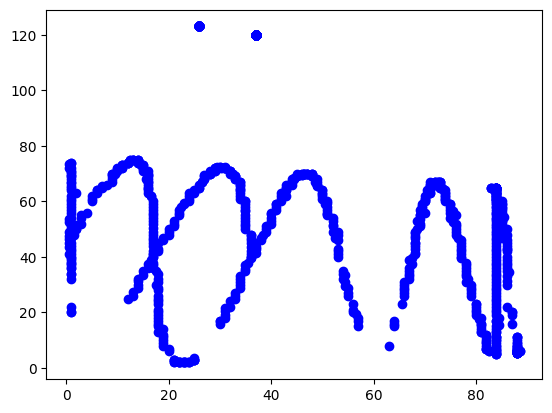

In [871]:
from matplotlib import pyplot as plt
plt.scatter(X_0_copy['u0'], X_0_copy['v0'], c='blue', marker='o', label='Original Values')


In [872]:
X_0_nan = X_0_nan.fillna(X_0_copy)
X_0_nan

,u0,v0
108,NaN,NaN
109,NaN,NaN
110,NaN,NaN
111,NaN,NaN
112,NaN,NaN
...,...,...
1437,NaN,NaN
1438,NaN,NaN
1439,NaN,NaN
1440,NaN,NaN


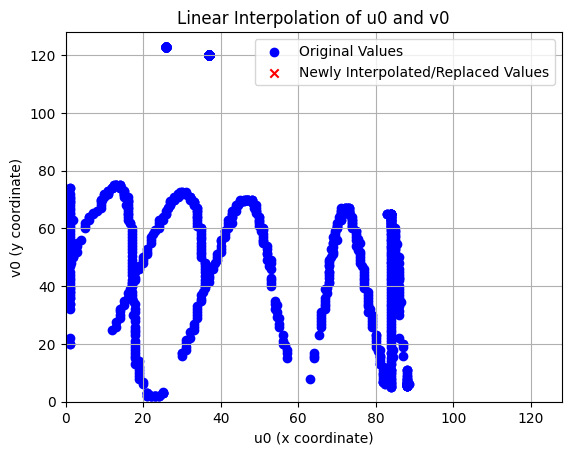

In [873]:
from matplotlib import pyplot as plt

# Plotting
plt.scatter(X_0_copy['u0'], X_0_copy['v0'], c='blue', marker='o', label='Original Values')
plt.scatter(X_0_nan.u0, X_0_nan.v0, c='red', marker='x', label='Newly Interpolated/Replaced Values')
plt.title('Linear Interpolation of u0 and v0')
plt.xlabel('u0 (x coordinate)')
plt.ylabel('v0 (y coordinate)')
plt.legend()
plt.grid(True)
plt.xlim(0, 128)
plt.ylim(0, 128)
plt.show()